# 네이버 맛집 정적 크롤링( 네이버가 서비스 안함..)

In [5]:
#맛집 분류 
#네이버 서비스 막힘
%matplotlib inline
#관려도순 상위 100개의 고기집 리스트 정보 API구하기
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import requests
import json

#네이버 플레이스 API를 호출하기위한 주소
source_url = "https://store.naver.com/sogum/api/businesses"

#검색 규칙 파라미터 추가
url_parameter_start = 'start=1'
url_parameter_display = '&display='
url_parameter_query='&query=강남역+고기집'
url_parameter_sorting = "&sortingOrder=precision"
url_concat = source_url + url_parameter_start + url_parameter_display + str(100) + url_parameter_query +url_parameter_sorting

#반환받은 API 데이터에 json.loads 함수를 사용
json_data = requests.get(url_concat).text
restaurant_list_data = json.loads(json_data)

#관련도순 상위 100개의 고기집 리스트 정보를 추출
print(str(restaurant_list_data))


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

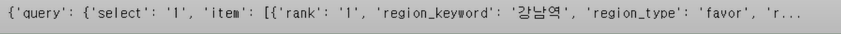

In [ ]:
import requests
from bs4 BeautifulSoup
import re
#크롤링에 필요한 id정보 추출
restaurant_id_list = []


#100개씩의 Api 호출 결과를 10회 가져온다 
for start_idx in [1,101,201,301,401,501,601,701,801,901]:
    
    #네이버 플레시으 API를 호출 위한 기본주소 
    source_url = 'https://store.naver.com/sogum/api/businesses'
    
    #검색 규칙 파라미터를 추가
    url_parameter_start = 'start=' +str(start_idx)
    url_parameter_display = '&display='
    url_parameter_query='&query=강남역+고기집'
    url_parameter_sorting = "&sortingOrder=precision"
    url_concat = source_url + url_parameter_start + url_parameter_display + str(start_idx+99) + url_parameter_query +url_parameter_sorting
    
    json_data = requests.get(url_concat).text
    restaurant_list_data = json.load(json_data)
    # 크롤링에 필요한 각 리뷰 상세 페이지의 id를 추출
    for restaurant in restaurant_list_data['items']:
        if 'moreBookingReviewsPath' in restaurant:
            restaurant_id_list.append(restaurant['id'])

restaurant_id_list = list(set(restaurant_id_list)) #레스토랑 id 를 크롤링해서 집어 넣는다 


columns = ['score', 'review']

#데이터 프레임을 만든다 
df = pd.DataFrame(columns = columns)

#리뷰 상세 페이지의 기본 주소
source_url_head = 'https://store.naver.com/restaurants/detail?id='
source_url_tail = '&tab=bookingReview#_tab'


for idx in range(0, len(restaurant_id_list)):
    
    #앞서 추출한 리뷰 상세 페이지의 레스토랑 id를 기본 주소의 파라미터로 추가
    #레스토랑 아이디 페이지
    req = requests.get(source_url_head + str(restaurant_id_list[idx]) + source_url_tail)
    #아이디 내용
    html = req.content
    #파싱
    soup = BeautifulSoup(html, 'lxml')
    #review_area 파씽
    review_area = soup.find(name = 'div', attrs = {'class':'review_area'})
    
    #리뷰가 없는 페이즌 아무 작업도 수행하지 않습니다  (다음꺼 수행)
    if review_area is None:
        continue
    
    #개발자 도구로 살펴본 html 구조에서 리뷰의 점수, 텍스트 부분을 추출
    review_list = review_area.find_all(name = 'div', attrs = {'class': 'info_area'})
    for review in review_list:
        score = review.find(name = 'span', attrs = {'class' : 'score'}).text
        review_txt = review.find(name='div', attrs={'class':'review_txt'}).text
        
        #추출한 리뷰의 점수, 리뷰텍스트를 데이터프레임으로 병합
        row = [score,review_txt]
        #series를 {'score': }
        series = pd.Series(row, index=df.columns)
        df = df.append(series, ignore_index = True)

# 4점 이상의 리뷰는 긍정 리뷰, 3점이하의 리뷰는 부정리뷰로 평가
df['y'] = df['score'].apply(lambda x: 1 if int(x) > 3 else 0)
print(df.shape)
df.head()




# 궁금해서 테스트 

In [17]:
columns = ['score', 'review']

test = pd.DataFrame(columns = columns)
test_row = ['123','1234']
test_series = pd.Series(test_row, index = test.columns)
print(test_series) #test_series = {'score':['123'], 'reivew':['1234']}
test =test.append(test_series, ignore_index = True)
test =test.append(test_series, ignore_index = True)
test

score      123
review    1234
dtype: object


,score,review
0,123,1234
1,123,1234


# 카카오 맛집 (동적 크롤링)

In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup
import re
import time

# brew 로 설치된 chromedriver의 path (Mac)
path = '/usr/local/bin/chromedriver'

# 윈도우용 크롬 웹드라이버 실행 경로 (Windows)
excutable_path = 'C:/chromedriver.exe'

# 크롤링할 사이트 주소를 정의합니다.
source_url = "https://map.kakao.com/"

# 크롬 드라이버를 사용합니다 (맥은 첫 줄, 윈도우는 두번째 줄 실행)
# driver = webdriver.Chrome(path)
driver = webdriver.Chrome(executable_path=excutable_path)

# 카카오 지도에 접속합니다
driver.get(source_url)

# 검색창에 검색어를 입력합니다
searchbox = driver.find_element_by_xpath("//input[@id='search.keyword.query']")
searchbox.send_keys("강남역 고기집")

# 검색버튼을 눌러서 결과를 가져옵니다
searchbutton = driver.find_element_by_xpath("//button[@id='search.keyword.submit']")
driver.execute_script("arguments[0].click();", searchbutton)

# 검색 결과를 가져올 시간을 기다립니다
time.sleep(2)

# 검색 결과의 페이지 소스를 가져옵니다
html = driver.page_source

# BeautifulSoup을 이용하여 html 정보를 파싱합니다
soup = BeautifulSoup(html, "html.parser")
moreviews = soup.find_all(name="a", attrs={"class":"moreview"})

# a태그의 href 속성을 리스트로 추출하여, 크롤링 할 페이지 리스트를 생성합니다.
page_urls = []
for moreview in moreviews:
    page_url = moreview.get("href")
    print(page_url)
    page_urls.append(page_url)

# 크롤링에 사용한 브라우저를 종료합니다.
driver.close()

https://place.map.kakao.com/85570955
https://place.map.kakao.com/1503746075
https://place.map.kakao.com/95713992
https://place.map.kakao.com/741391811
https://place.map.kakao.com/2011092566
https://place.map.kakao.com/13573220
https://place.map.kakao.com/2062959414
https://place.map.kakao.com/1648266796
https://place.map.kakao.com/168079537
https://place.map.kakao.com/263830255
https://place.map.kakao.com/27238067
https://place.map.kakao.com/26431943
https://place.map.kakao.com/1780387311
https://place.map.kakao.com/1907052666
https://place.map.kakao.com/1052874675
https://place.map.kakao.com/1576421052


### [맛집 리뷰 정보 크롤링]

In [3]:
import pandas as pd
columns = ['score', 'review']
df = pd.DataFrame(columns=columns)

# driver = webdriver.Chrome(path)  # for Mac
driver = webdriver.Chrome(executable_path=excutable_path)  # for Windows
#내가 정적으로 바꿔서 해보기
for page_url in page_urls:
    
    # 상세보기 페이지에 접속합니다
    driver.get(page_url)
    time.sleep(2)
    
    # 첫 페이지 리뷰를 크롤링합니다
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    contents_div = soup.find(name="div", attrs={"class":"evaluation_review"})
    
    # 별점을 가져옵니다.
    rates = contents_div.find_all(name="em", attrs={"class":"num_rate"})
    print(rates)
    
    # 리뷰를 가져옵니다.
    reviews = contents_div.find_all(name="p", attrs={"class":"txt_comment"})
    print(reviews)
    
    for rate, review in zip(rates, reviews):
        row = [rate.text[0], review.find(name="span").text]
        #시리즈로 만들고 
        series = pd.Series(row, index=df.columns)
        #데이터프레임에 넣어주기
        df = df.append(series, ignore_index=True)
    
    # 2-5페이지의 리뷰를 크롤링합니다
    for button_num in range(2, 6):
        # 오류가 나는 경우(리뷰 페이지가 없는 경우), 수행하지 않습니다.
        try:
            #다음 버튼
            another_reviews = driver.find_element_by_xpath("//a[@data-page='" + str(button_num) + "']")
            another_reviews.click()
            time.sleep(2)
            
            # 페이지 리뷰를 크롤링합니다
            html = driver.page_source
            soup = BeautifulSoup(html, 'html.parser')
            contents_div = soup.find(name="div", attrs={"class":"evaluation_review"})

            # 별점을 가져옵니다.
            rates = contents_div.find_all(name="em", attrs={"class":"num_rate"})

            # 리뷰를 가져옵니다.
            reviews = contents_div.find_all(name="p", attrs={"class":"txt_comment"})
            #리뷰 한개씩 짤라서 저장
            for rate, review in zip(rates, reviews):
                #rate : text에 첫번째꺼 점수 , review에 span text가 리뷰
                row = [rate.text[0], review.find(name="span").text]
                series = pd.Series(row, index=df.columns)
                df = df.append(series, ignore_index=True)
        except:
            break    
driver.close()

[<em class="num_rate">1<span class="screen_out">점</span></em>, <em class="num_rate">5<span class="screen_out">점</span></em>, <em class="num_rate">5<span class="screen_out">점</span></em>, <em class="num_rate">4<span class="screen_out">점</span></em>, <em class="num_rate">4<span class="screen_out">점</span></em>]
[<p class="txt_comment"><span>예약할 때는 룸을 주기로 하고 홀을 주고, 덥고, 직원들이 정신이 없어 그 가격에 내가 직접 구워먹고 갈비살, 등심은 질기고 냉면은 맛이 없고 장어 양념들도 제 때 안 가져다 주고 회식으로 한시간만에 120만원을 썼는데 이런 경험 처음입니다.</span><button class="btn_fold" type="button">더보기</button></p>, <p class="txt_comment"><span>점심식사 잘했던곳.후식커피한잔 하기도 좋고 주차가능합니다. 음식 맛있고 직원분 친절하여 절로 미소가 지어졌어요. </span><button class="btn_fold" type="button">더보기</button></p>, <p class="txt_comment"><span>新鮮でおいしいです。</span><button class="btn_fold" type="button">더보기</button></p>, <p class="txt_comment"><span>녹는다 녹아</span><button class="btn_fold" type="button">더보기</button></p>, <p class="txt_comment"><span></span><button class="btn_fold" type="button">더보기</button></p>]
[<em clas

[<em class="num_rate">2<span class="screen_out">점</span></em>, <em class="num_rate">5<span class="screen_out">점</span></em>, <em class="num_rate">2<span class="screen_out">점</span></em>, <em class="num_rate">5<span class="screen_out">점</span></em>, <em class="num_rate">5<span class="screen_out">점</span></em>]
[<p class="txt_comment"><span>친절하고 깨끗하지만 곱창이 너무 질겨서 실망이었어요ㅜㅜ 별점에비해 맛은 그닥..대파김치덕분에 다 먹었네요</span><button class="btn_fold" type="button">더보기</button></p>, <p class="txt_comment"><span>곱창을 좋아해서 생각없이들어가서먹었는데 곱도많이들어있고 냄새도안나고 질긴것도없고 맛있네요  볶음밥이 신의한수!!  가게내부도 깔끔하고 좋았어요</span><button class="btn_fold" type="button">더보기</button></p>, <p class="txt_comment"><span>그냥 평범함...ㄹㅇ</span><button class="btn_fold" type="button">더보기</button></p>, <p class="txt_comment"><span>대충 친구랑 밥 먹으러 들어갔다가 생각보다 맛있어서 괜찮았어요 사장님도 친절하시고 감사합니당</span><button class="btn_fold" type="button">더보기</button></p>, <p class="txt_comment"><span>어후 소주 안먹고는 안될 맛이었어요 술마실 생각 없었는데;; 진짜 맛있게 잘 먹고 배터질거같다 하면서 나오면서도 여기 또 오자 하고 나왔네요</span><bu

In [3]:
import pandas as pd
# 4점 이상의 리뷰는 긍정 리뷰, 3점 이하의 리뷰는 부정 리뷰로 평가합니다.
df['y'] = df['score'].apply(lambda x: 1 if float(x) > 3 else 0)
print(df.shape)
df.head()

(383, 3)


,score,review,y
0,1,"예약할 때는 룸을 주기로 하고 홀을 주고, 덥고, 직원들이 정신이 없어 그 가격에 ...",0
1,5,점심식사 잘했던곳.후식커피한잔 하기도 좋고 주차가능합니다. 음식 맛있고 직원분 친절...,1
2,5,新鮮でおいしいです。,1
3,4,녹는다 녹아,1
4,4,nan,1


In [ ]:
#데이터 저장
df.to_csv("review_data.csv", index=False)

In [15]:
import pandas as pd
df = pd.read_csv("review_data.csv")
df = df.astype({'review':'str'})
df

,score,review,y
0,1,"예약할 때는 룸을 주기로 하고 홀을 주고, 덥고, 직원들이 정신이 없어 그 가격에 ...",0
1,5,점심식사 잘했던곳.후식커피한잔 하기도 좋고 주차가능합니다. 음식 맛있고 직원분 친절...,1
2,5,新鮮でおいしいです。,1
3,4,녹는다 녹아,1
4,4,nan,1
...,...,...,...
378,5,7시에가서1시간왜이팅..기다리는거 싨머하는데..참고기다려봄..근데 먹고나보니 강남역...,1
379,4,맛있게 잘 먹었습니다!,1
380,4,맛있는데 웨이팅까지해서 먹을건... 모르겠어요,1
381,2,음...... 음... 덮밥에 소스가 너무 많아서 단 밥이 됐어요... 대창 역시나...,0


In [16]:
import re

#텍스트 정제 함수: 한글 이외의 문자는 전부 제거
def text_cleaning(text):
    #한글의 정규표현식으로 한글만 추출
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]+')
    result = hangul.sub('',text)
    return result

#함수를 적용하여 리뷰에서 한글만 추출
df['ko_text'] = df['review'].apply(lambda x : text_cleaning(x))
del df['review']
df

,score,y,ko_text
0,1,0,예약할 때는 룸을 주기로 하고 홀을 주고 덥고 직원들이 정신이 없어 그 가격에 내가...
1,5,1,점심식사 잘했던곳후식커피한잔 하기도 좋고 주차가능합니다 음식 맛있고 직원분 친절하여...
2,5,1,
3,4,1,녹는다 녹아
4,4,1,
...,...,...,...
378,5,1,시에가서시간왜이팅기다리는거 싨머하는데참고기다려봄근데 먹고나보니 강남역에 저녁시간이고...
379,4,1,맛있게 잘 먹었습니다
380,4,1,맛있는데 웨이팅까지해서 먹을건 모르겠어요
381,2,0,음 음 덮밥에 소스가 너무 많아서 단 밥이 됐어요 대창 역시나 너무 느끼하네요 느끼...


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   score    383 non-null    int64 
 1   y        383 non-null    int64 
 2   ko_text  383 non-null    object
dtypes: int64(2), object(1)
memory usage: 9.1+ KB


In [18]:
import numpy as np
df = df.astype({'ko_text':'str'})
df=df[df['ko_text']!=""]
df=df.reset_index(drop = True)
df



,score,y,ko_text
0,1,0,예약할 때는 룸을 주기로 하고 홀을 주고 덥고 직원들이 정신이 없어 그 가격에 내가...
1,5,1,점심식사 잘했던곳후식커피한잔 하기도 좋고 주차가능합니다 음식 맛있고 직원분 친절하여...
2,4,1,녹는다 녹아
3,5,1,흠잡을곳 없는 반찬이 정갈합니다
4,5,1,코로나 땜에 걱정했는데 방역수칙도 잘 지키시고 살치실이랑 등심 부드러워서 너무 좋아...
...,...,...,...
308,5,1,시에가서시간왜이팅기다리는거 싨머하는데참고기다려봄근데 먹고나보니 강남역에 저녁시간이고...
309,4,1,맛있게 잘 먹었습니다
310,4,1,맛있는데 웨이팅까지해서 먹을건 모르겠어요
311,2,0,음 음 덮밥에 소스가 너무 많아서 단 밥이 됐어요 대창 역시나 너무 느끼하네요 느끼...


### 형태소 추출

In [19]:
from konlpy.tag import Okt
#konlpy 라이브러리로 텍스트 데이터에서 형태소를 추출
def get_pos(x):
    tagger = Okt()
    pos = tagger.pos(x)
    pos = ['{}/{}'.format(word,tag) for word, tag in pos]
    return pos

In [20]:
df['ko_text'][0]

'예약할 때는 룸을 주기로 하고 홀을 주고 덥고 직원들이 정신이 없어 그 가격에 내가 직접 구워먹고 갈비살 등심은 질기고 냉면은 맛이 없고 장어 양념들도 제 때 안 가져다 주고 회식으로 한시간만에 만원을 썼는데 이런 경험 처음입니다'

In [21]:
#형태소 추출 동작 테스트 
result = get_pos(df['ko_text'][0])
print(result)

['예약/Noun', '할/Verb', '때/Noun', '는/Josa', '룸/Noun', '을/Josa', '주기/Noun', '로/Josa', '하고/Verb', '홀/Noun', '을/Josa', '주고/Verb', '덥고/Adjective', '직원/Noun', '들/Suffix', '이/Josa', '정신/Noun', '이/Josa', '없어/Adjective', '그/Noun', '가격/Noun', '에/Josa', '내/Noun', '가/Josa', '직접/Noun', '구워/Verb', '먹고/Verb', '갈비살/Noun', '등심/Noun', '은/Josa', '질/Noun', '기고/Noun', '냉면/Noun', '은/Josa', '맛/Noun', '이/Josa', '없고/Adjective', '장어/Noun', '양념/Noun', '들/Suffix', '도/Josa', '제/Noun', '때/Noun', '안/Noun', '가져다/Verb', '주고/Verb', '회식/Noun', '으로/Josa', '한/Determiner', '시간/Noun', '만에/Josa', '만원/Noun', '을/Josa', '썼는데/Verb', '이런/Adjective', '경험/Noun', '처음/Noun', '입니다/Adjective']


In [22]:
#벡터화
from sklearn.feature_extraction.text import CountVectorizer

#형태소를 벡터 형태의 학습 데이터셋(X 데이터)으로 변환
index_vectorizer = CountVectorizer(tokenizer = lambda x : get_pos(x))
X = index_vectorizer.fit_transform(df['ko_text'].tolist())
#토큰화로 열을 늘려준다 
print(X.shape)

(313, 2438)


In [23]:
print(str(index_vectorizer.vocabulary_)[:100]+',,')

{'예약/Noun': 1594, '할/Verb': 2336, '때/Noun': 690, '는/Josa': 486, '룸/Noun': 723, '을/Josa': 1698, '주기/N,,


In [24]:
print(df['ko_text'][0])
print(X[0])

예약할 때는 룸을 주기로 하고 홀을 주고 덥고 직원들이 정신이 없어 그 가격에 내가 직접 구워먹고 갈비살 등심은 질기고 냉면은 맛이 없고 장어 양념들도 제 때 안 가져다 주고 회식으로 한시간만에 만원을 썼는데 이런 경험 처음입니다
  (0, 1594)	1
  (0, 2336)	1
  (0, 690)	2
  (0, 486)	1
  (0, 723)	1
  (0, 1698)	3
  (0, 1992)	1
  (0, 718)	1
  (0, 2274)	1
  (0, 2400)	1
  (0, 1990)	2
  (0, 575)	1
  (0, 2041)	1
  (0, 654)	2
  (0, 1712)	3
  (0, 1927)	1
  (0, 1535)	1
  (0, 260)	1
  (0, 35)	1
  (0, 1551)	1
  (0, 420)	1
  (0, 30)	1
  (0, 2043)	1
  (0, 222)	1
  (0, 839)	1
  (0, 83)	1
  (0, 677)	1
  (0, 1697)	2
  (0, 2046)	1
  (0, 302)	1
  (0, 431)	1
  (0, 777)	1
  (0, 1520)	1
  (0, 1862)	1
  (0, 1478)	1
  (0, 585)	1
  (0, 1930)	1
  (0, 1408)	1
  (0, 66)	1
  (0, 2414)	1
  (0, 1692)	1
  (0, 2320)	1
  (0, 1282)	1
  (0, 753)	1
  (0, 754)	1
  (0, 1354)	1
  (0, 1732)	1
  (0, 164)	1
  (0, 2111)	1
  (0, 1799)	1


## TF-IDF(Term Frequency-Inverse Document Frequecy)

- 단어 빈도를 나타내는 Tf와 문서 빈도를 나타내는 DF의 역수(Inverse)인 IDF를 곱한 값을 의미합니다.
- 만약 1번 텍스트에 '맛집' 이라는 단어가 3번 등장하고, 모든 데이터에서 '맛집'이라는 단어가 10개의 텍스트에 등장한다고 할 때,
- TF : 3 IDF : 0.1이된다 따라서 TF-IDF는 다른 문서들에서는 등장하지 않지만 현재 문서에서는 많이 등장하는 단어를 의미하며 그단어가 현재 문서에서 얼마나 중요한지를 피처로 나타내는 방법


In [26]:
from sklearn.feature_extraction.text import TfidfTransformer

#TF-IDF 방법으로 형태소를 벡터 형태의 학습 데이터셋(X 데이터)으로 변환합니다
tfidf_vectorizer = TfidfTransformer()
X = tfidf_vectorizer.fit_transform(X)

print(X.shape)
print(X[0])

(313, 2438)
  (0, 2414)	0.12238914390959485
  (0, 2400)	0.15552599271448392
  (0, 2336)	0.1197659293266783
  (0, 2320)	0.12528897309578083
  (0, 2274)	0.1414665792463585
  (0, 2111)	0.1197659293266783
  (0, 2046)	0.12528897309578083
  (0, 2043)	0.12528897309578083
  (0, 2041)	0.08038761628790153
  (0, 1992)	0.16668557699642333
  (0, 1990)	0.282933158492717
  (0, 1930)	0.128530706322896
  (0, 1927)	0.13644855737772027
  (0, 1862)	0.13644855737772027
  (0, 1799)	0.10196886072158479
  (0, 1732)	0.1414665792463585
  (0, 1712)	0.1714593354755764
  (0, 1698)	0.26858672912392567
  (0, 1697)	0.14174335961185974
  (0, 1692)	0.09124965257614828
  (0, 1594)	0.1197659293266783
  (0, 1551)	0.062222626545806854
  (0, 1535)	0.15552599271448392
  (0, 1520)	0.11516811289275837
  (0, 1478)	0.13220588034028785
  (0, 1408)	0.11516811289275837
  (0, 1354)	0.16668557699642333
  (0, 1282)	0.1173711220409566
  (0, 839)	0.10945327098613235
  (0, 777)	0.07045147437121156
  (0, 754)	0.13644855737772027
  (0, 753

# 분류 : 긍정/부정 리뷰 분류

In [27]:
from sklearn.model_selection import train_test_split

y = df['y']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(219, 2438) (94, 2438)
(219,) (94,)


## 분류 모델링: 로지스틱 회귀 모델


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#로지스틱 회귀 모델을 학습
lr = L